<a href="https://colab.research.google.com/github/Dankeser/machine-learning/blob/main/text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Original dataset: https://www.kaggle.com/datasets/advaypatil/youtube-statistics

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/comments.csv")

In [6]:
df.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [44]:
df.shape

(18409, 5)

In [49]:
np.where(df.Comment.isnull() == True)

(array([9745]),)

In [50]:
df.Comment[9745]

nan

In [51]:
df = df.drop(9745)
df.shape

(18408, 5)

In [5]:
comments = df.Comment.dropna(axis=0)
vectorizer = TfidfVectorizer(stop_words="english")
vectorized_comments = vectorizer.fit_transform(comments)

In [23]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_comments.toarray())

In [24]:
np.save('reduced_data.npy', reduced_data)

In [25]:
model = KMeans(n_clusters=3, random_state=42,max_iter=500,n_init="auto")
model.fit(reduced_data)

KMeans(max_iter=500, n_clusters=3, n_init='auto', random_state=42)

In [15]:
df.shape

(18409, 5)

In [13]:
reduced_data.shape

(18408, 3)

In [33]:
type(reduced_data)

numpy.ndarray

In [34]:
type(df.Sentiment)

pandas.core.series.Series

In [31]:
model.labels_[100:120], df.Sentiment[100:120]


(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0],
       dtype=int32),
 100    1.0
 101    2.0
 102    2.0
 103    2.0
 104    2.0
 105    0.0
 106    2.0
 107    2.0
 108    2.0
 109    2.0
 110    2.0
 111    2.0
 112    2.0
 113    2.0
 114    2.0
 115    2.0
 116    2.0
 117    2.0
 118    2.0
 119    2.0
 Name: Sentiment, dtype: float64)

### Unsupervised clustering try

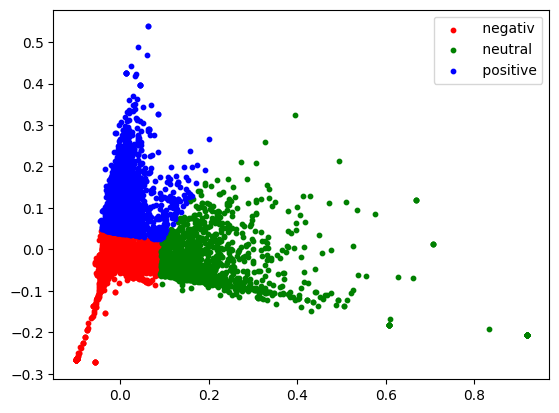

In [58]:

# plot the results
colors = ['red', 'green',"blue"]
cluster = ["negativ","neutral","positive"]
for i in range(num_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0],
                reduced_data[kmeans.labels_ == i, 1],
                s=10, color=colors[i],
                label=f' {cluster[i]}')
plt.legend()
plt.show()

In [52]:
sentiments = df.Sentiment

In [53]:
comments.shape, sentiments.shape

((18408,), (18408,))

In [43]:
sentiments.isnull().sum()

0

### Clustering of original dataset, here i can see that this is different then previous clustering

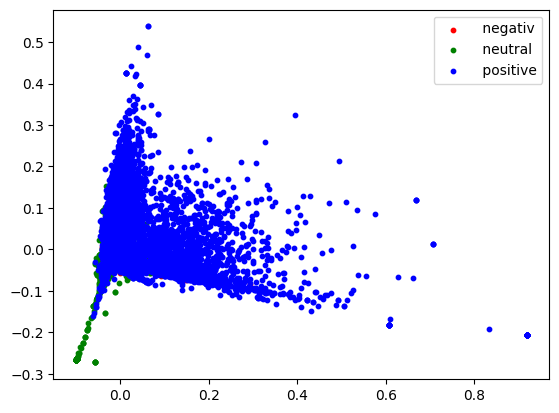

In [60]:
kmeans = model
num_clusters = 3

# plot the results
colors = ['red', 'green',"blue"]
cluster = ["negativ","neutral","positive"]
for i in range(num_clusters):
    plt.scatter(reduced_data[sentiments == i, 0],
                reduced_data[sentiments == i, 1],
                s=10, color=colors[i],
                label=f' {cluster[i]}')
plt.legend()
plt.show()

In [12]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(model,f)